## Image Enhancement in Spatial Domain using Point Processing Techniques

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd

### Load the data

In [2]:
train = pd.read_csv('images/mnist_train.csv')

print(train.shape)

(60000, 785)


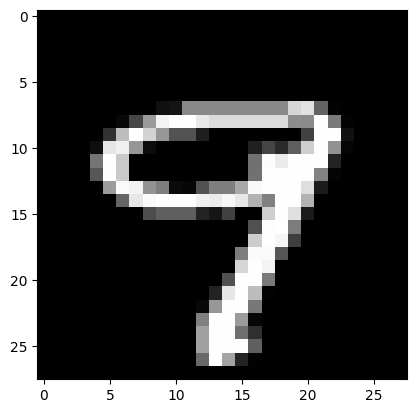

In [7]:
row_num = np.random.randint(train.shape[0])

pixels = train.iloc[row_num][1:].values.reshape(28, 28)
image = np.array(pixels, dtype=np.uint8)
image = Image.fromarray(image)

plt.imshow(image, cmap='gray')
plt.show()

### Constrast Stretching

In [9]:
def contrast_stretching(image):
    image = np.array(image)
    temp = image.copy()
    
    image_min = np.min(image)
    image_max = np.max(image)
    
    L = 256
    
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            temp[i][j] = ((image[i][j] - image_min) / (image_max - image_min)) * (L - 1)
            
    return temp.astype(np.uint8)

stretched_image = contrast_stretching(image)

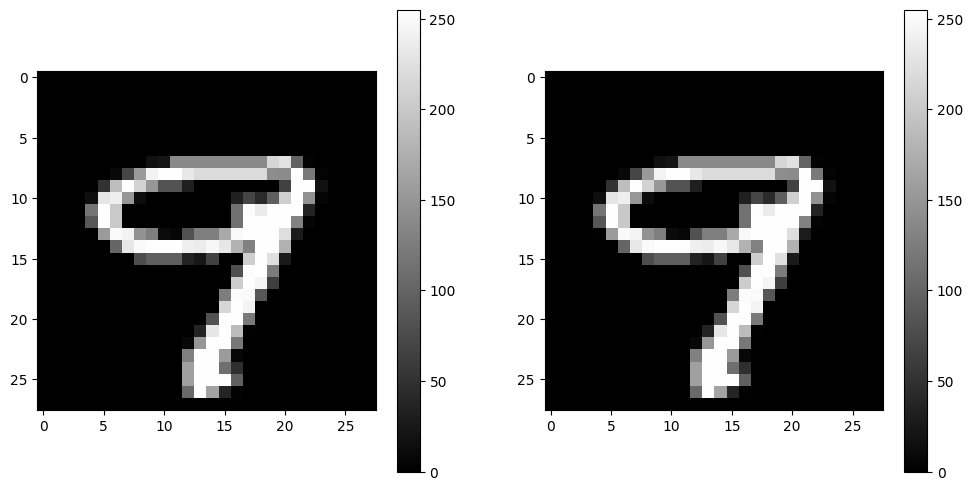

In [10]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.colorbar()
plt.subplot(1, 2 ,2)
plt.imshow(stretched_image, cmap='gray')
plt.colorbar()

plt.show()

### Log Transformation

In [12]:
def log_transformation(image):
    image = np.array(image)
    temp = image.astype(np.float32)
    
    image_max = np.max(temp)
    c = 255 / np.log(1 + image_max)
    
    # Apply log transformation
    temp = c * np.log(1 + temp)
    
    return temp.astype(np.uint8)

log_image = log_transformation(image)

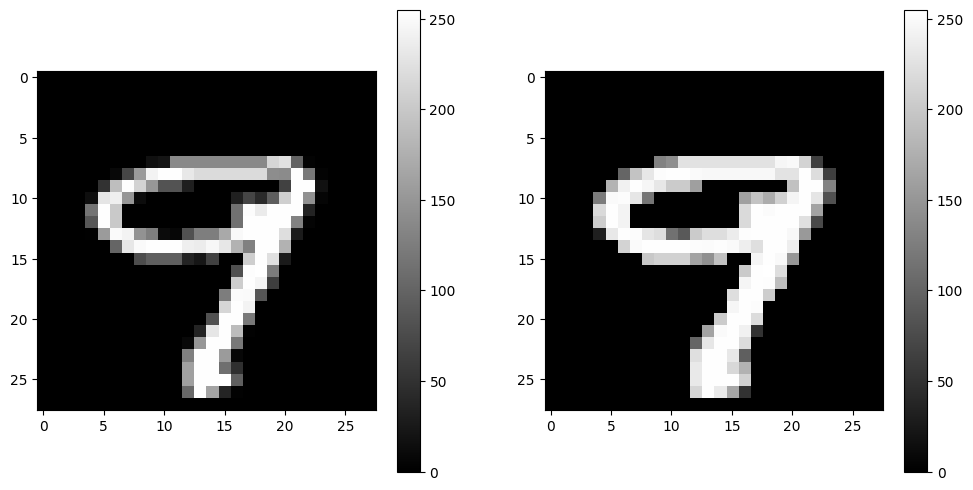

In [13]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.colorbar()
plt.subplot(1, 2 ,2)
plt.imshow(log_image, cmap='gray')
plt.colorbar()

plt.show()

In [14]:
def power_transformation(image, gamma):
    image = np.array(image)
    temp = image.astype(np.float32)
    
    # Normalize the image to the range [0, 1]
    temp /= 255.0
    
    # Apply power transformation
    temp = np.power(temp, gamma)
    
    # Scale back to the range [0, 255]
    temp *= 255
    
    return temp.astype(np.uint8)

gamma = 2.0  # Example gamma value
power_transformed_image = power_transformation(image, gamma)

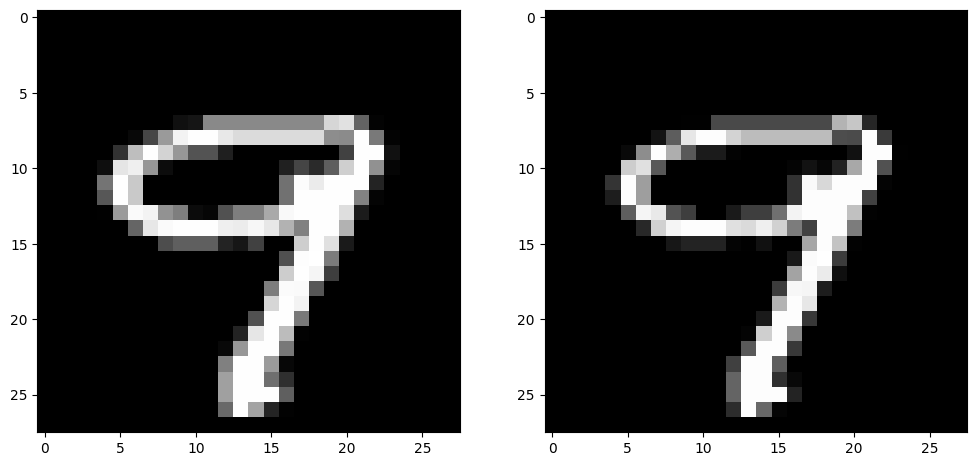

In [15]:
power_image = power_transformation(image, gamma)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.subplot(1, 2 ,2)
plt.imshow(power_image, cmap='gray')
plt.show()